In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# How to see your current working directory (cwd).
# import os

# print os.getcwd()

# pd.read_csv('')


url = 'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
advertising = pd.read_csv(url)

advertising = advertising.drop('Unnamed: 0', axis=1)
N = 20
advertising = advertising.head(N)

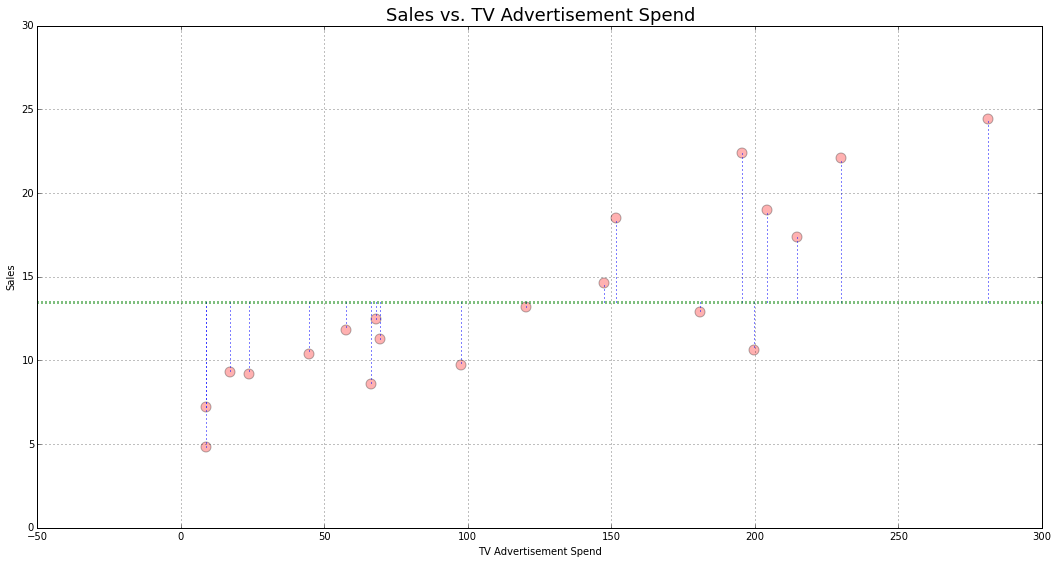

In [4]:
x = advertising['TV']
y = advertising['Sales']


plt.figure(figsize=(18, 9))
axes = plt.gca()

axes.grid(True)
axes.scatter(x, y, c='r', s=100, alpha=0.3, linewidth=1)

y_mean = y.mean()

axes.set_title('Sales vs. TV Advertisement Spend', fontsize=18)
axes.set_xlabel('TV Advertisement Spend')
axes.set_ylabel('Sales')

axes.axhline(y_mean, c='g', linewidth=3, linestyle=':')

axes.vlines(x, y_mean, y, linestyle=':', alpha=1, colors=['blue'])

In [5]:
# Step 2: Deriving beta_0 and beta_1, from a set of points in x and y
from sklearn import linear_model

regressor = linear_model.LinearRegression()

print x.shape

regressor.fit(x[:, np.newaxis], y)

print regressor.coef_
print regressor.intercept_


(20,)
[ 0.05569331]
6.85023099268


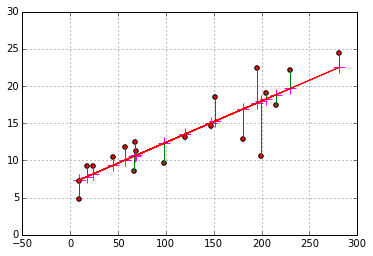

In [6]:
x_min = x.min()
x_max = x.max()

plt.figure()

axes_regression = plt.gca()
#print x

# multiply my coeff with my independent variable and add the y intercept
y_hat = np.multiply(regressor.coef_, x) + regressor.intercept_

# A plot of my model with points for each value of x
axes_regression.scatter(x, y_hat, c='magenta', marker='+', linewidth=1, s=150)
axes_regression.plot(x, y_hat, c='r')

axes_regression.scatter(x, y, c='r')

axes_regression.grid(True)


axes_regression.vlines(x, y_hat, y, colors=['g'])
# sikit learn to find the line of best fit in my dataset, then given the points we already knew
#we ploted thoes along the line and found the difference between each of the points and the
#line, these are the residuals, if we sum up all the residuals and find the difference then we divided
#it by the the sum of squares is related to our r-squared.
